In [1]:
from tools_edmz.params import *

import os
import numpy as np 

import h5py

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import SimpleITK as sitk

Atlases were downloaded from Solisa/Sophie/atlases

In [2]:
FOLDER = '/home/etienne.doumazane/data/Solisa/Atlases'

In [3]:
os.listdir(FOLDER)

['P5', 'P14', 'P7', 'P4', 'P21', 'P1', 'P3']

## Exploring P7 atlas

In [4]:
os.listdir(os.path.join(FOLDER, 'P7'))

['normed_max_atlas_auto.nrrd',
 'ano_P7.tif',
 'normed_max_atlas_auto.tif',
 'ano_P7.nrrd',
 'old',
 'transfo']

### Annotation

In [8]:
fname = os.path.join(FOLDER, 'P7', 'ano_P7.nrrd')
itk_image = sitk.ReadImage(fname)
array = sitk.GetArrayFromImage(itk_image)

In [9]:
array.shape

(262, 588, 357)

In [10]:
values, counts = np.unique(array, return_counts=True)
pd.DataFrame(dict(value=values, count=counts)).sort_values(by="count", ascending=False).reset_index(drop=True)

,value,count
0,0,33637363
1,315,2255806
2,1065,2253669
3,997,1515274
4,512,1483310
5,1097,1384181
6,500,1208561
7,1080,1179892
8,313,1141853
9,672,971333


0.6116107475342009
0.0


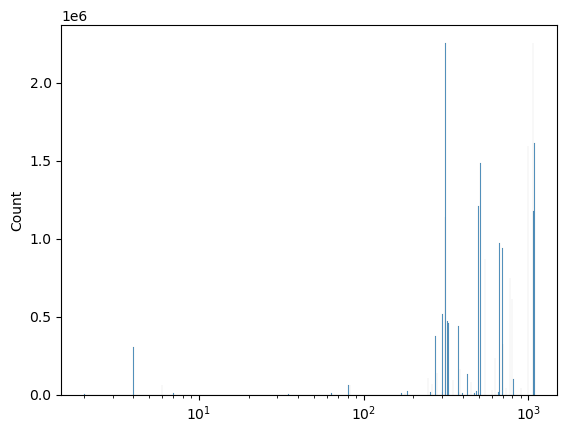

In [11]:
print((array == 0).mean())
print((array < 0).mean())

sns.histplot(array[array>0].flatten(), log_scale=True);

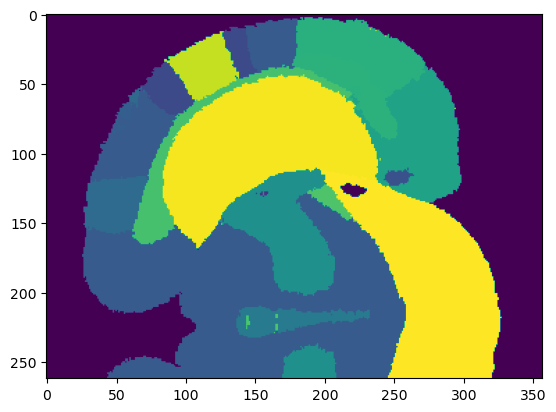

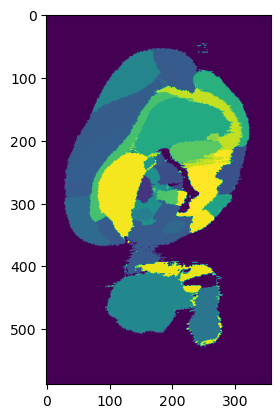

In [13]:
plt.imshow(array[:,300,:])
plt.show()
plt.imshow(array[130,:,:])
plt.show()

## Autofluorescence

In [14]:
fname = os.path.join(FOLDER, 'P7', 'normed_max_atlas_auto.nrrd')
itk_image = sitk.ReadImage(fname)
array = sitk.GetArrayFromImage(itk_image)

In [15]:
array.shape

(262, 588, 357)

0.0
0.0


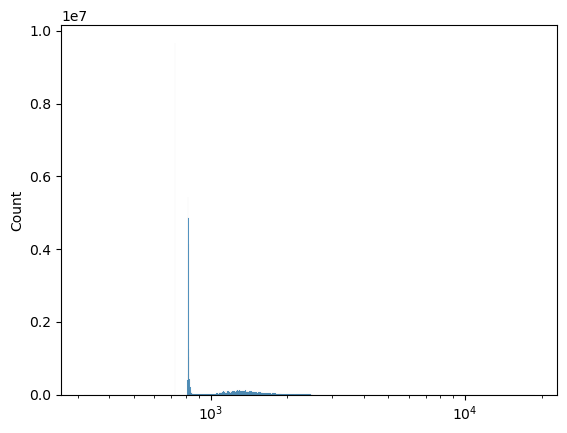

In [16]:
print((array == 0).mean())
print((array < 0).mean())

sns.histplot(array[array>0].flatten(), log_scale=True);

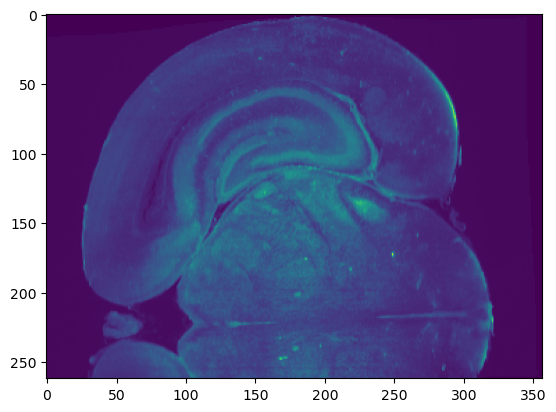

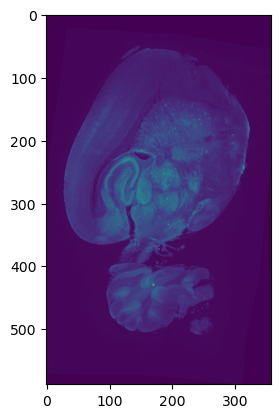

In [17]:
plt.imshow(array[:,300,:])
plt.show()
plt.imshow(array[130,:,:])
plt.show()

### Other atlases

In [19]:
for stage in ['P1', 'P3', 'P4',  'P5','P7','P14', 'P21', ]:
    print(stage)
    print(os.listdir(os.path.join(FOLDER, stage)))

P1
['elastix_P4_to_timepoint', 'old', 'transfo']
P3
['ano_full_P3.tif', 'ano_full_sagital.tif', 'Screenshot from 2022-02-16 16-59-13.png', 'Screenshot from 2022-02-16 17-01-56.png', 'Screenshot from 2022-02-16 17-01-29.png', 'Screenshot from 2022-02-16 17-00-41.png', 'ano_full.tif', 'old_regions', 'transfo']
P4
['tempP4.nrrd', 'anoP4.nrrd', 'anoP4_cleaned.nrrd']
P5
['normed_max_atlas_auto_new.tif', 'merge_goodP5.tif', 'new_template', 'old', 'transfo']
P7
['normed_max_atlas_auto.nrrd', 'ano_P7.tif', 'normed_max_atlas_auto.tif', 'ano_P7.nrrd', 'old', 'transfo']
P14
['ano_P14.tif', 'P14_template_halfbrain_rescaled_oriented.tif', '14c_resampled_autofluorescence_corrected_sagital.tif', 'normed_max_atlas_auto_old.tif']
P21
[]
